In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [11]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data = data.drop('RowNumber', axis = 1)
data = data.drop('CustomerId', axis = 1)
data = data.drop('Surname', axis = 1)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
cols = ['Geography', 'Gender']
l = LabelEncoder()

In [16]:
data[cols] = data[cols].apply(l.fit_transform)

In [ ]:
data.info()

<Axes: >

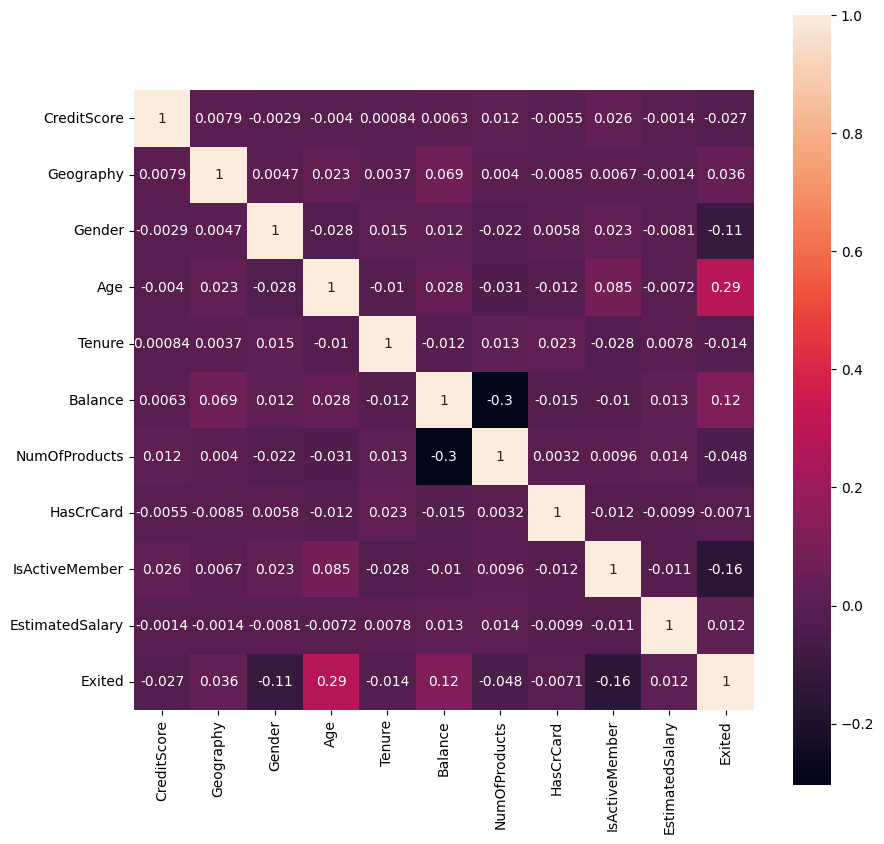

In [17]:
datacorr = data.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(datacorr, annot = True, square = True)

In [18]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [25]:
x_scaler = StandardScaler()
scaled_x = x_scaler.fit_transform(x)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 42)

In [30]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [33]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.001, patience = 150, verbose = 1, restore_best_weights = True)
model.fit(x_train, y_train, epochs = 500, callbacks = [early_stopping], validation_split = 0.2, batch_size = 32)

Epoch 1/500
200/200 [==============================] - 2s 4ms/step - loss: 0.5086 - accuracy: 0.7688 - val_loss: 0.4592 - val_accuracy: 0.7987
Epoch 2/500
200/200 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7936 - val_loss: 0.4372 - val_accuracy: 0.7987
Epoch 3/500
200/200 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.7997 - val_loss: 0.4197 - val_accuracy: 0.8206
Epoch 4/500
200/200 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8205 - val_loss: 0.3982 - val_accuracy: 0.8413
Epoch 5/500
200/200 [==============================] - 1s 3ms/step - loss: 0.3933 - accuracy: 0.8369 - val_loss: 0.3839 - val_accuracy: 0.8425
Epoch 6/500
200/200 [==============================] - 1s 3ms/step - loss: 0.3787 - accuracy: 0.8461 - val_loss: 0.3756 - val_accuracy: 0.8450
Epoch 7/500
200/200 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8495 - val_loss: 0.3701 - val_accuracy: 0.8444

In [34]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8520


[0.34854835271835327, 0.8519999980926514]

In [35]:
y_pred = model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [36]:
r2_score(y_test, y_pred)

0.3248919776997796